In [1]:
import pandas as pd
import talib
import yfinance as yf





In [2]:
# Load stock price data
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\META_historical_data.csv') 
# Convert 'Date' to datetime format and set it as the index
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert relevant columns to numeric and fill null values
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count null values
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Remove rows with any null values
df_cleaned = df.dropna()

# Display shape before and after cleaning
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# If you need to continue with calculations
df_cleaned['SMA'] = talib.SMA(df_cleaned['Close'], timeperiod=14)
df_cleaned['RSI'] = talib.RSI(df_cleaned['Close'], timeperiod=14)
df_cleaned['MACD'], df_cleaned['MACD_Signal'], df_cleaned['MACD_Hist'] = talib.MACD(df_cleaned['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Final DataFrame structure
print("Final cleaned DataFrame structure:")
print(df_cleaned.info())
print(df.dtypes)

Null values in each column:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Original DataFrame shape: (2926, 8)
Cleaned DataFrame shape: (2926, 8)
Final cleaned DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2926 entries, 2012-12-12 to 2024-07-30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2926 non-null   float64
 1   High          2926 non-null   float64
 2   Low           2926 non-null   float64
 3   Close         2926 non-null   float64
 4   Adj Close     2926 non-null   float64
 5   Volume        2926 non-null   int64  
 6   Dividends     2926 non-null   float64
 7   Stock Splits  2926 non-null   float64
 8   SMA           2913 non-null   float64
 9   RSI           2912 non-null   float64
 10  MACD          2893 non-null   float64
 11  MACD_Signal   2893 n

In [3]:
null_counts = df.isnull().sum()

In [4]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [5]:
# If 'Date' is found, convert it to datetime and set as index
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\META_historical_data.csv') 
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    print("Date column converted and set as index.")
    df=[print(df.head)]
   
else:
    print("No 'Date' column found. Please check the CSV structure.")
    


Date column converted and set as index.
<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-12-12   28.000000   28.139999   27.370001   27.580000   27.523441   
2012-12-13   27.590000   28.750000   27.430000   28.240000   28.182087   
2012-12-14   28.180000   28.330000   26.760000   26.809999   26.755020   
2012-12-17   26.770000   27.000000   26.320000   26.750000   26.695143   
2012-12-18   26.959999   27.910000   26.900000   27.709999   27.653173   
...                ...         ...         ...         ...         ...   
2024-07-24  472.309998  476.299988  460.579987  461.269989  461.269989   
2024-07-25  463.260010  463.549988  442.649994  453.410004  453.410004   
2024-07-26  464.200012  469.769989  459.420013  465.700012  465.700012   
2024-07-29  469.880005  473.959991  465.019989  465.709991  465.709991   
2024-07-30  467.000000  472.730011  456.70

In [3]:
import pandas as pd
import talib
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\META_historical_data.csv') 
# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days
# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12,slowperiod=26,signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()
# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])                    

           Close        SMA        RSI       MACD  MACD_Signal  MACD_Hist
200    50.230000   30.25245  59.884785   2.964726     2.675432   0.289294
201    50.419998   30.36335  59.951534   2.950121     2.730370   0.219751
202    50.279999   30.48070  59.877751   2.893890     2.763074   0.130816
203    49.180000   30.59285  59.301438   2.729107     2.756280  -0.027173
204    51.040001   30.70950  59.956412   2.717279     2.748480  -0.031201
...          ...        ...        ...        ...          ...        ...
2921  461.269989  428.20065  53.893405  -6.550694    -1.274374  -5.276320
2922  453.410004  428.89055  53.538414  -8.810746    -2.781648  -6.029098
2923  465.700012  429.62725  54.014417  -9.500635    -4.125446  -5.375189
2924  465.709991  430.34660  54.014802  -9.932081    -5.286773  -4.645308
2925  463.190002  431.02345  53.900434 -10.357947    -6.301008  -4.056939

[2726 rows x 6 columns]


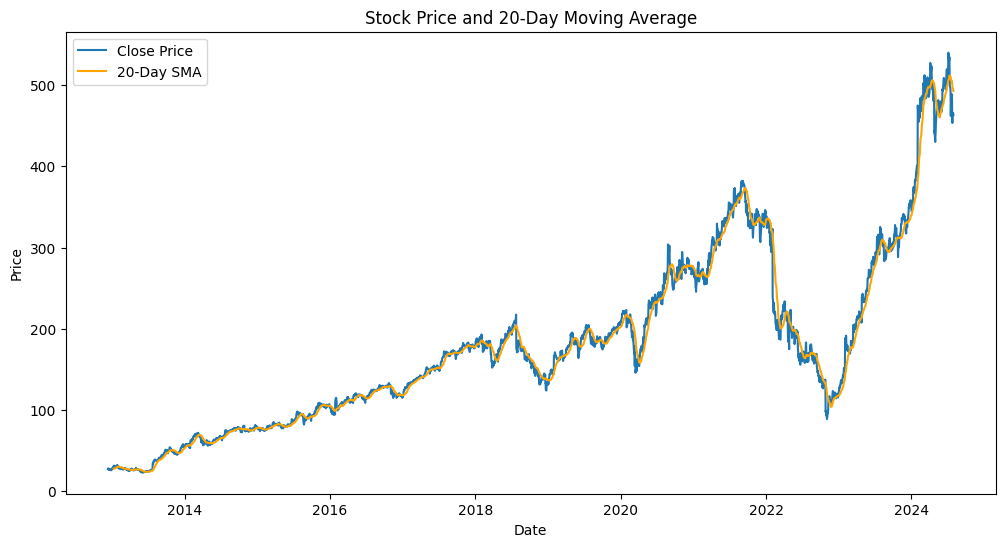

In [4]:
import matplotlib.pyplot as plt
# Load the data into a DataFrame
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\META_historical_data.csv', parse_dates=['Date'], index_col='Date')

# Ensure the 'Close' column is  correct data type
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate a 20-day moving average
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
# Plot the closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and 20-Day Moving Average')
plt.legend()
plt.show()